In [22]:
import pandas as pd
df = pd.DataFrame({'a':[1,2,3], 'b':[4,5,6]})
df.to_numpy()

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int64)

In [31]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mse

In [26]:
(xTrain, yTrain), (xVal, yVal) =  boston_housing.load_data()
mean, std = xTrain.mean(axis=0), xTrain.std(axis=0)
xTrain, xVal = (xTrain-mean)/std, (xVal-mean)/std
print(xTrain.shape, yTrain.shape, xVal.shape, yVal.shape)

(404, 13) (404,) (102, 13) (102,)


In [38]:
inputL = Input(shape=(13,))
x = Dense(128, activation='relu')(inputL)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(1)(x)

model = Model(inputL, x)
model.compile(loss=mse, optimizer=Adam(lr=0.0001))
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0   

In [39]:
loss, val_loss = [], []

In [64]:
history = model.fit(xTrain, yTrain, validation_data=(xVal,yVal), epochs=200, batch_size=100)
loss = loss + history.history['loss']
val_loss = val_loss + history.history['val_loss']

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 0s 30us/step - loss: 17.9575 - val_loss: 24.9778
Epoch 2/200
404/404 [==============================] - 0s 27us/step - loss: 19.8906 - val_loss: 25.0041
Epoch 3/200
404/404 [==============================] - 0s 27us/step - loss: 17.3033 - val_loss: 24.8854
Epoch 4/200
404/404 [==============================] - 0s 30us/step - loss: 17.9888 - val_loss: 24.8379
Epoch 5/200
404/404 [==============================] - 0s 32us/step - loss: 17.5425 - val_loss: 24.7843
Epoch 6/200
404/404 [==============================] - 0s 32us/step - loss: 17.1045 - val_loss: 24.6919
Epoch 7/200
404/404 [==============================] - 0s 30us/step - loss: 21.5628 - val_loss: 24.5577
Epoch 8/200
404/404 [==============================] - 0s 30us/step - loss: 17.5980 - val_loss: 24.3976
Epoch 9/200
404/404 [==============================] - 0s 30us/step - loss: 18.3954 - val_loss: 24.3147
Epoch 10/200
404/4

404/404 [==============================] - 0s 27us/step - loss: 15.2637 - val_loss: 22.6817
Epoch 79/200
404/404 [==============================] - 0s 25us/step - loss: 16.3669 - val_loss: 22.4826
Epoch 80/200
404/404 [==============================] - 0s 30us/step - loss: 15.3299 - val_loss: 22.3244
Epoch 81/200
404/404 [==============================] - 0s 30us/step - loss: 15.6104 - val_loss: 22.3665
Epoch 82/200
404/404 [==============================] - 0s 22us/step - loss: 16.1720 - val_loss: 22.4119
Epoch 83/200
404/404 [==============================] - 0s 30us/step - loss: 16.3394 - val_loss: 22.4507
Epoch 84/200
404/404 [==============================] - 0s 30us/step - loss: 15.4474 - val_loss: 22.6884
Epoch 85/200
404/404 [==============================] - 0s 30us/step - loss: 15.2977 - val_loss: 22.7146
Epoch 86/200
404/404 [==============================] - 0s 27us/step - loss: 15.4705 - val_loss: 22.7107
Epoch 87/200
404/404 [==============================] - 0s 32us/step

404/404 [==============================] - 0s 27us/step - loss: 13.3399 - val_loss: 23.8399
Epoch 156/200
404/404 [==============================] - 0s 30us/step - loss: 15.3466 - val_loss: 23.8319
Epoch 157/200
404/404 [==============================] - 0s 22us/step - loss: 14.7378 - val_loss: 23.6980
Epoch 158/200
404/404 [==============================] - 0s 27us/step - loss: 14.5356 - val_loss: 22.8324
Epoch 159/200
404/404 [==============================] - 0s 27us/step - loss: 14.2248 - val_loss: 22.3065
Epoch 160/200
404/404 [==============================] - 0s 25us/step - loss: 14.1021 - val_loss: 22.0175
Epoch 161/200
404/404 [==============================] - 0s 27us/step - loss: 13.8420 - val_loss: 21.8011
Epoch 162/200
404/404 [==============================] - 0s 28us/step - loss: 12.2040 - val_loss: 21.7353
Epoch 163/200
404/404 [==============================] - 0s 27us/step - loss: 14.0116 - val_loss: 21.7590
Epoch 164/200
404/404 [==============================] - 0s 

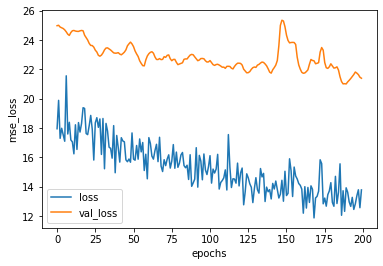

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('mse_loss')
plt.show()

In [66]:
pred = model.predict(xVal).reshape(102)

In [67]:
pd.options.display.max_rows = None
D = {'real_price': yVal, 'pred':pred, 'error_percent': np.round(abs(yVal-pred)/yVal,4)*100 }
df = pd.DataFrame(D)
print(df)
print("mean error percent={}%".format( round(df['error_percent'].mean(),2) ))

     real_price       pred  error_percent
0           7.2   8.217720          14.14
1          18.8  18.374062           2.27
2          19.0  20.923437          10.12
3          27.0  31.212591          15.60
4          22.2  25.170401          13.38
5          24.5  18.516745          24.42
6          31.2  25.767475          17.41
7          22.9  21.003216           8.28
8          20.5  20.430307           0.34
9          23.2  21.709227           6.43
10         18.6  21.514826          15.67
11         14.5  17.157652          18.33
12         17.8  15.707360          11.76
13         50.0  41.965054          16.07
14         20.8  17.470949          16.01
15         24.3  18.484621          23.93
16         24.2  28.024534          15.80
17         19.8  21.122099           6.68
18         19.1  18.291132           4.23
19         22.7  30.953922          36.36
20         12.0  10.642615          11.31
21         10.2  16.183044          58.66
22         20.0  19.536688        